In [1]:
import pandas as pd
import numpy as np

users_df = pd.read_csv("users.csv")
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")\

print users_df.head()
print movies_df.head()
print ratings_df.head()

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
print users_df.shape

count = 0
curUser = 1
hist = []
users = pd.DataFrame(ratings_df['UserID'])
for ind, rating in users.iterrows():
    if (rating.item() != curUser):
        hist.append(count)
        count = 0
        curUser += 1
    else:
        count += 1
        
    
        

(6040, 5)


KeyboardInterrupt: 

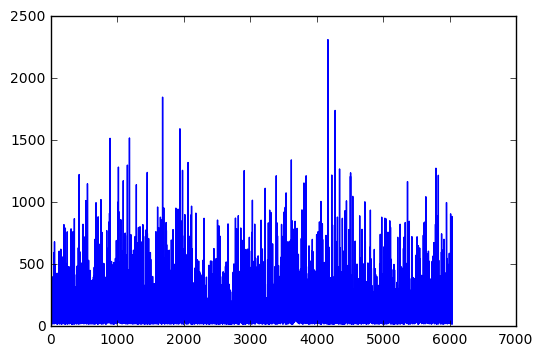

In [54]:
%matplotlib inline

xHist = range(0, len(hist))
plt.plot(xHist, hist)

In [84]:
curUser = 1
avgRating = []
ratingCount = 0
curRating = 0
ratings = ratings_df['Rating']
print(ratings[1])

hist2 = pd.DataFrame(hist)
for ind, numUserRatings in hist2.iterrows():
    for ind2 in range(numUserRatings):
        curRating += ratings[ratingCount]
        ratingCount += 1
        
    avg = curRating / numUserRatings
    avgRating.append(avg)
    curUser += 1
    curRating = 0
    

3


In [85]:
#del users_df['Average']
#del users_df[0]
avgRatingPD = pd.DataFrame(avgRating)
avgRatingPD.columns = ['Average']
print(avgRatingPD.head())
users_df = pd.concat([users_df, avgRatingPD], axis=1)
print users_df.head()

    Average
0  4.188679
1  3.703125
2  3.900000
3  4.100000
4  3.187817
   UserID Gender  Age  Occupation Zip-code   Average
0       1      F    1          10    48067  4.188679
1       2      M   56          16    70072  3.703125
2       3      M   25          15    55117  3.900000
3       4      M   45           7    02460  4.100000
4       5      M   25          20    55455  3.187817


In [75]:
#users_df.to_csv('users_avg.csv')

In [2]:
from sklearn.cross_validation import train_test_split

#split data by users

ratingsGrid = []
for i in range(3954):
    ratingsGrid.append([])
    for j in range(6041):
        ratingsGrid[i].append(0)

     
for ind, row in ratings_df.iterrows():
    ratingsGrid[row['MovieID']][row['UserID']] = row['Rating']
#arbitrary 
print ratings_df.shape
print users_df.shape
print movies_df.shape

print ratingsGrid[0][0]

C:\Users\Mobremius\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(1000209, 4)
(6040, 5)
(3883, 3)
0


In [3]:
ratingsGridPD = pd.DataFrame(ratingsGrid)
ratingsGridPD.to_csv('ratingGrid.csv')

In [151]:


averages = users_df['Average']
print averages[1]

for ind, row in ratings_df.iterrows():
    if(row)




3.703125


IndexError: list index out of range

In [170]:
data = pd.read_csv("ratingsGrid.csv")
dataArr = data.as_matrix()
dataArr = dataArr[:, 1:]
users_df = pd.read_csv("users_avg.csv")
print users_df["Average"][2]
print dataArr.shape

3.9
(3953L, 6041L)


In [167]:
import math


def findSimilarity(movie1, movie2, grid):
    users = []
    ratings1 = grid[movie1]
    ratings2 = grid[movie2]
    for ind in range(len(ratings1)):
        if(ratings1[ind] != 0 and ratings2[ind] != 0):
            users.append(ind)
    difab = 0
    difas = 0
    difbs = 0
    for ind in range(len(users)):
        userID = users[ind]
        avg = users_df['Average'][userID - 1]
        rating1 = grid[movie1][userID]
        rating2 = grid[movie2][userID]
        difab += (rating1 - avg) * (rating2 - avg)
        difas += np.power(rating1 - avg, 2)
        difbs += np.power(rating2 - avg, 2)
    if (difas == 0 or difbs == 0):
        return 0

    sim = (difab) / (np.sqrt(difas * difbs))
    return sim

user = 1
movie = 2
K = 15

def knn(user, movie, K, grid, grid2):
    #all movies rated by user
    userMovies = []
    userRatings = []


    for ind in range(len(grid)):
        userRatings.append(grid[ind][user])


    for ind in range(len(userRatings)):
        if (userRatings[ind] != 0):
            userMovies.append(ind)

    simList = [0] * len(grid) 
    for ind in range(len(userMovies)):
        sim = findSimilarity(movie, userMovies[ind], grid2)
        if (user == 4530 and movie == 668 and math.isnan(sim)):
            print userMovies[ind]
        simList[userMovies[ind]] = sim
    simListSort = np.argsort(simList)[::-1]
    #if (user == 4530 and movie == 668):
           # print simList
           # print simListSort
    top = 0
    bot = 0
    for ind in range(K):
        thisSim = simList[simListSort[ind]]
        top += thisSim * grid[simListSort[ind]][user]
        bot += np.abs(thisSim)
    rating = top / bot
    return rating


0


In [168]:
#test, train
trainArr = dataArr[:, 0:4027]
testArr = dataArr[:, 4027:]
print trainArr.shape
print testArr.shape




(3953L, 4027L)
(3953L, 2014L)


In [103]:
tempTestArr = list(dataArr)
tempTestArr[1][4029] = 0
print knn(4030, 111, 6, tempTestArr, trainArr)
print knn(4030, 111, 6, dataArr, trainArr)
print knn(4030, 111, 6, dataArr, dataArr)

3.37539900229
3.37539900229
3.37903213829


In [127]:
def knn2(user, movie, K, grid, grid2):
    #all movies rated by user
    userMovies = []
    userRatings = []


    for ind in range(len(grid)):
        userRatings.append(grid[ind][user])


    for ind in range(len(userRatings)):
        if (userRatings[ind] != 0):
            userMovies.append(ind)

    simList = [0] * len(grid) 
    for ind in range(len(userMovies)):
        simList[userMovies[ind]] = findSimilarity(movie, userMovies[ind], grid2)
    simListSort = np.argsort(simList)[::-1]
    return simList, simListSort

kvalues = []
real = []
for i in range(10):
    kvalues.append([])
    

print len(kvalues[0][0])
            
func myTest():
    myCount = 0
    for userID in range(4028,6041):
        for movieID in range(3953):
            if (dataArr[movieID][userID] != 0):
                simList, simListSort = knn2(userID, movieID, KT, dataArr, trainArr)
                for KT in range(1, 11):
                    top = 0
                    bot = 0
                    for ind in range(KT):
                        thisSim = simList[simListSort[ind]]
                        top += thisSim * dataArr[simListSort[ind]][user]
                        bot += np.abs(thisSim)
                    rating = top / bot
                    kvalues[KT - 1][movieID][userID - 4028] = rating
                real.append(dataArr[movieID][userID])

kerror = []
for KT in range(10):
    kerror.append(mean_squared_error(testArr, kvalues[KT]))
        
print kerror   

2013


KeyboardInterrupt: 

In [182]:
import copy


def test():
    pred = []
    actual = []
    myCount = 0
    for userID in range(4530,6041):
        for movieID in range(3953):
            if (dataArr[movieID][userID] != 0):
                tempArr = copy.copy(dataArr)
                tempArr[movieID][userID] = 0
                myCount += 1
                actual.append(dataArr[movieID][userID])
                x = knn(userID, movieID, 8, tempArr, trainArr)
                pred.append(x)
                break
                
        if (myCount == 20):
                    return pred, actual


myPred, myActual = test()
print myPred
print myActual
print mean_squared_error(myActual, myPred)
#1, 2.3
#2, 1.57094705748
#3 1.27081847605
#4 1.13136713235
#5 0.933342566404
#6 0.912397748029
#7 0.928215850559
#8 0.948251257831

[3.6500927109642975, 3.7686893918315221, 4.1133990638662183, 3.8533712638576154, 4.2490404186090194, 4.3506397823665397, 4.6264330363179873, 3.7634728904849841, 2.627976666613288, 1.0, 4.0200463820473971, 3.6510623491154051, 3.9895884640426238, 4.481938147459033, 3.8771150098084721, 3.8853678480125695, 4.5081918960770198, 3.0588655566461957, 4.1573637257020604, 2.39606367967095]
[4, 3, 5, 2, 3, 4, 3, 3, 2, 2, 4, 4, 5, 5, 4, 5, 4, 4, 3, 4]
0.948251247831


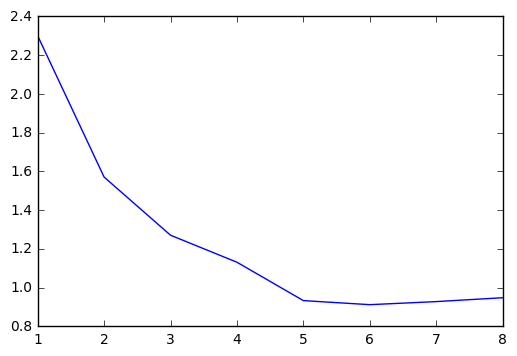

In [183]:
x = range(1, 9)
y = [2.3, 1.57094705748, 1.27081847605, 1.13136713235, 0.933342566404, 0.912397748029, 0.928215850559, 0.948251257831]
plt.plot(x, y)

In [11]:
dataArr = data.as_matrix()
#3953, 6042
print dataArr.shape

movieHist = [0] * 3954

for i in range(3953):
    for j in range(6041):
        if (dataArr[i][j] != 0):
            movieHist[i] += 1
            
print movieHist


(3953L, 6042L)
[0, 2077, 702, 479, 171, 297, 941, 459, 69, 103, 889, 1034, 161, 100, 154, 147, 683, 835, 158, 390, 161, 1357, 379, 127, 625, 980, 101, 62, 180, 403, 74, 142, 1511, 5, 1751, 71, 928, 9, 29, 1362, 31, 243, 222, 167, 312, 544, 167, 1138, 383, 28, 1783, 1, 432, 9, 42, 46, 10, 100, 501, 9, 358, 68, 542, 112, 80, 144, 98, 5, 61, 320, 915, 97, 94, 225, 121, 13, 179, 35, 51, 115, 52, 167, 90, 34, 22, 195, 237, 77, 193, 230, 7, 1, 89, 90, 183, 639, 14, 45, 7, 51, 129, 254, 61, 34, 683, 388, 13, 257, 8, 1, 2444, 1240, 571, 54, 12, 1, 42, 80, 69, 14, 4, 38, 195, 116, 15, 319, 100, 2, 13, 14, 3, 17, 92, 2, 3, 134, 9, 14, 3, 2, 140, 683, 2, 1, 434, 363, 19, 182, 24, 48, 1251, 555, 70, 778, 168, 88, 67, 188, 260, 117, 566, 760, 491, 541, 380, 826, 62, 6, 363, 114, 322, 94, 459, 565, 82, 221, 206, 140, 20, 49, 452, 94, 50, 30, 27, 570, 212, 106, 191, 16, 101, 76, 3, 218, 214, 165, 551, 18, 606, 118, 13, 34, 31, 204, 204, 86, 83, 220, 652, 53, 42, 35, 15, 123, 29, 161, 356, 65, 196, 23

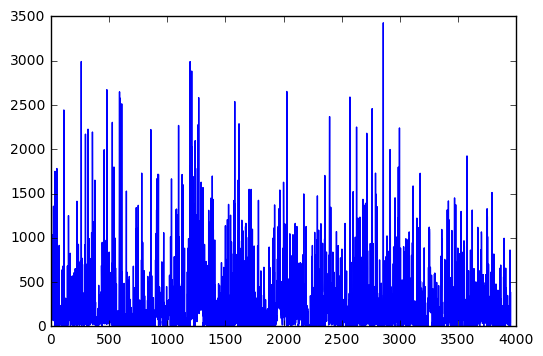

In [12]:
xMovieHist = range(0, len(movieHist))
plt.plot(xMovieHist, movieHist)

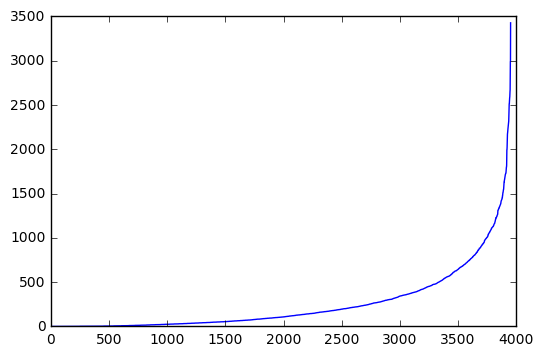

In [13]:
movieHistSorted = sorted(movieHist)
plt.plot(xMovieHist, movieHistSorted)